# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
import seaborn as sns
import numpy as np
from yellowbrick.cluster import KElbowVisualizer #Mengimpor KElbowVisualizer untuk visualisasi metode Elbow

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.feature_selection import VarianceThreshold


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('bank_transactions_data_2.csv')
# Mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**


**1. Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [3]:
df.sample(3)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
2181,TX002182,AC00189,13.30,2023-06-06 16:36:30,Debit,San Antonio,D000167,144.228.168.6,M009,ATM,23,Student,63,1,213.00,2024-11-04 08:09:17
391,TX000392,AC00116,133.73,2023-05-16 16:21:42,Credit,San Jose,D000664,83.80.89.29,M001,Online,25,Student,123,1,1872.22,2024-11-04 08:09:22
1307,TX001308,AC00024,28.78,2023-08-07 16:08:04,Credit,Tucson,D000041,186.135.2.148,M096,Online,40,Doctor,51,1,680.55,2024-11-04 08:11:39


In [4]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
# Apabila jumlah nilai non-null konsisten, maka kemungkinan besar tidak ada data yang null
df.info()

jumlah_baris, jumlah_kolom = df.shape
print(f"\nJumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dari dataset untuk seluruh kolom
df.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002496,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


In [6]:
# Mengetahui jumlah unik AccountID dan TransactionID
jml_unik_accountid = df['AccountID'].nunique()
jml_unik_transactionid = df['TransactionID'].nunique()

print(f"Jumlah unik AccountID: {jml_unik_accountid}")
print(f"Jumlah unik TransactionID: {jml_unik_transactionid}")

Jumlah unik AccountID: 495
Jumlah unik TransactionID: 2512


**2. Menangani Data yang Hilang**
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

In [7]:
df.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Tidak terdapat data yang null/NA. Apabila ada, maka nantinya akan ditangani pada bagian "Data Preprocessing"

**3. Analisis Distribusi dan Korelasi**
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.
   
**4. Visualisasi Data**
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

In [8]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


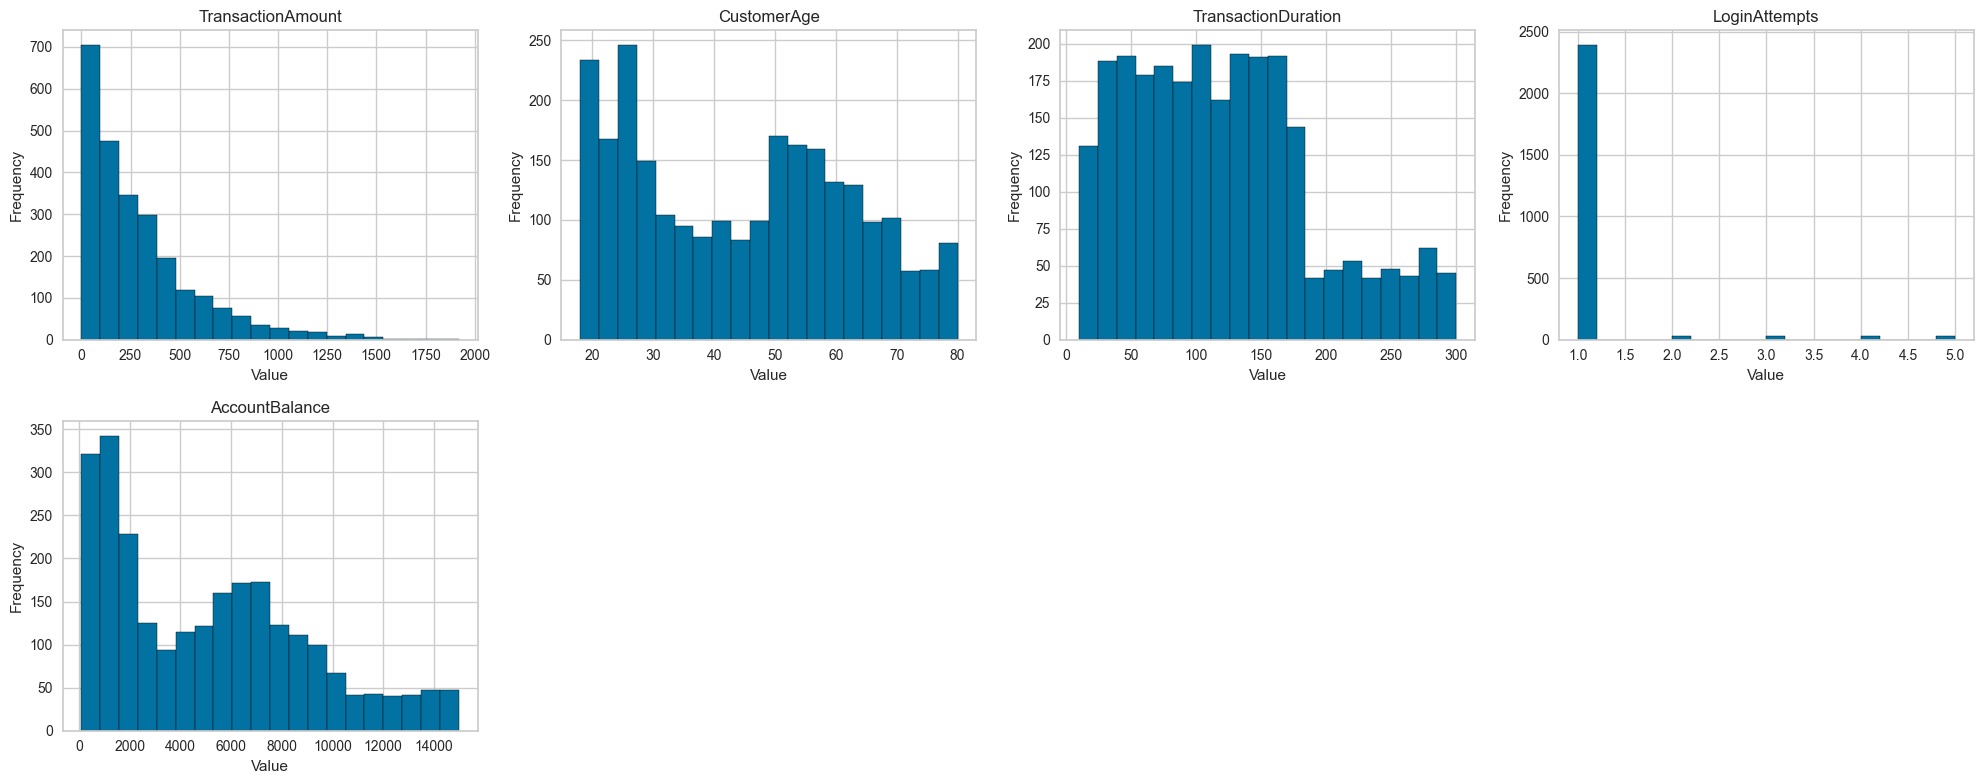

In [9]:
# Visualisasi variabel numerik
# Identifikasi kolom numerik
numerical_cols = df.select_dtypes(include=['number']).columns
# Menentukan jumlah variabel numerik
num_numerical_vars = len(numerical_cols)
# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4
n_rows = -(-num_numerical_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot histogram untuk setiap variabel numerik
for i, column in enumerate(numerical_cols):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

Untuk membuat visualisasi yang lebih ringkas, dapat dilakukan _binning_ nantinya pada variabel yang dikehendaki

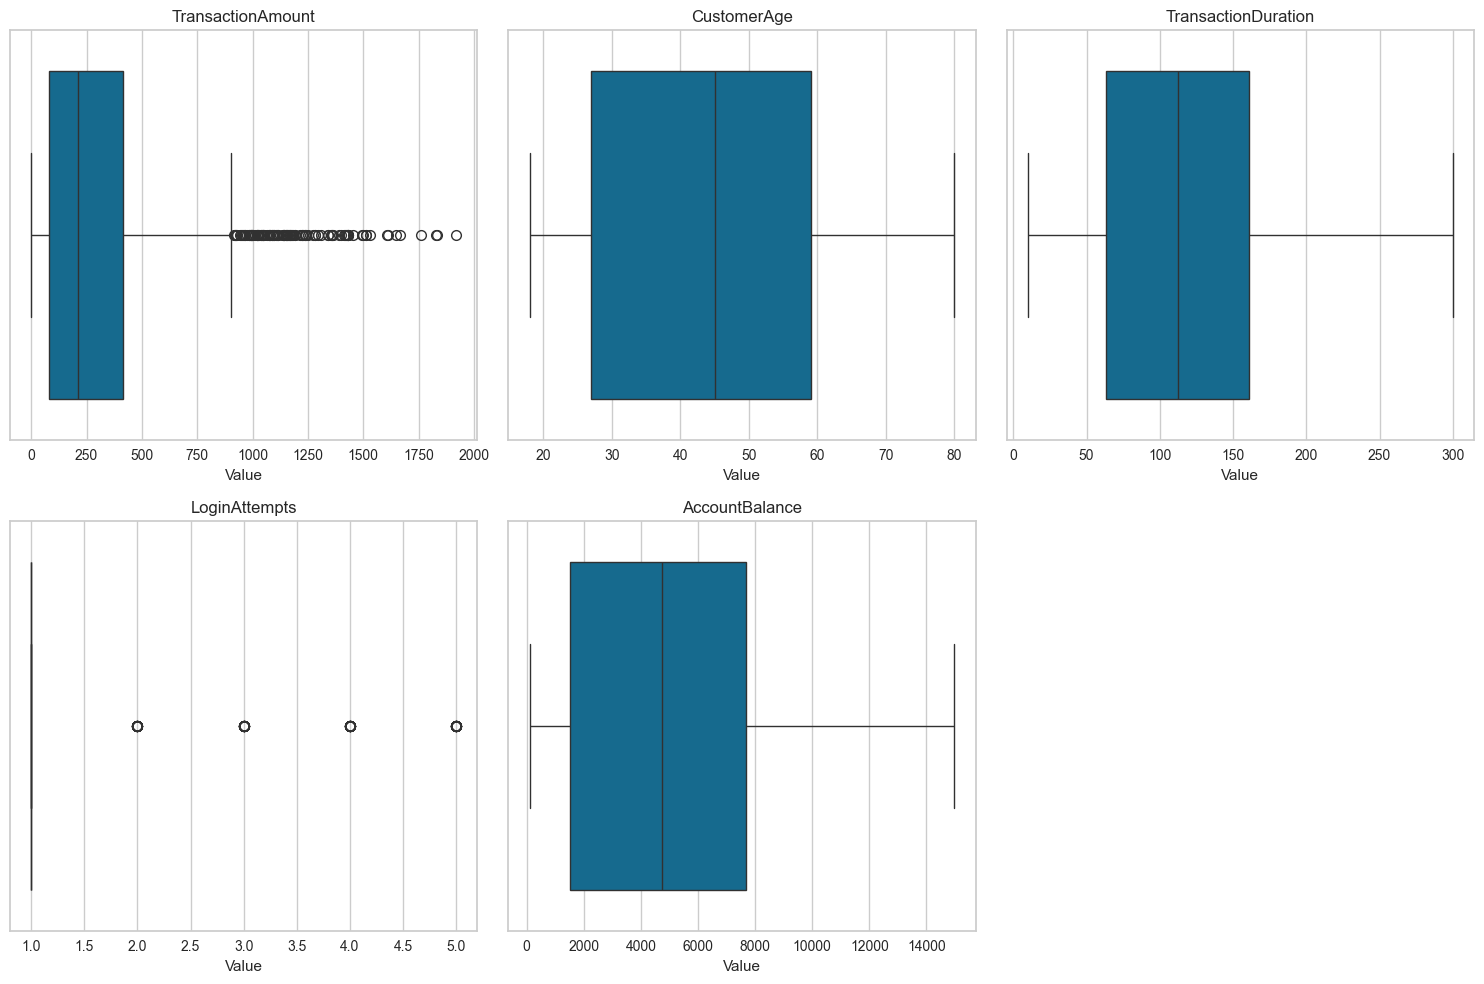

In [10]:
# Identifikasi outlier menggunakan boxplot
# Tentukan jumlah baris dan kolom untuk grid subplot
n_cols = 3
n_rows = -(-num_numerical_vars // n_cols)

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten axes array
axes = axes.flatten()

# Plot boxplot untuk setiap variabel numerik
for i, column in enumerate(numerical_cols):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')

# Menghapus subplot yang tidak terpakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout
plt.tight_layout()
plt.show()

Outlier pada variabel TransactionAmount dan LoginAttempts wajar. Hal ini karena sistem perbankan melayani berbagai jenis pelanggan dengan kebutuhan transaksi yang berbeda, terdapat pelanggan yang melakukan pembelian atau transfer dengan jumlah yang besar. Outlier pada LoginAttempts yang menunjukkan angka percobaan login di atas satu merupakan hal normal karena kesalahan login dapat terjadi, baik dari pengguna maupun teknis. Namun, supaya meminimalisir kesalahan pada model clustering, outlier TransactionAmount yang ekstrim ini akan ditangani nantinya.

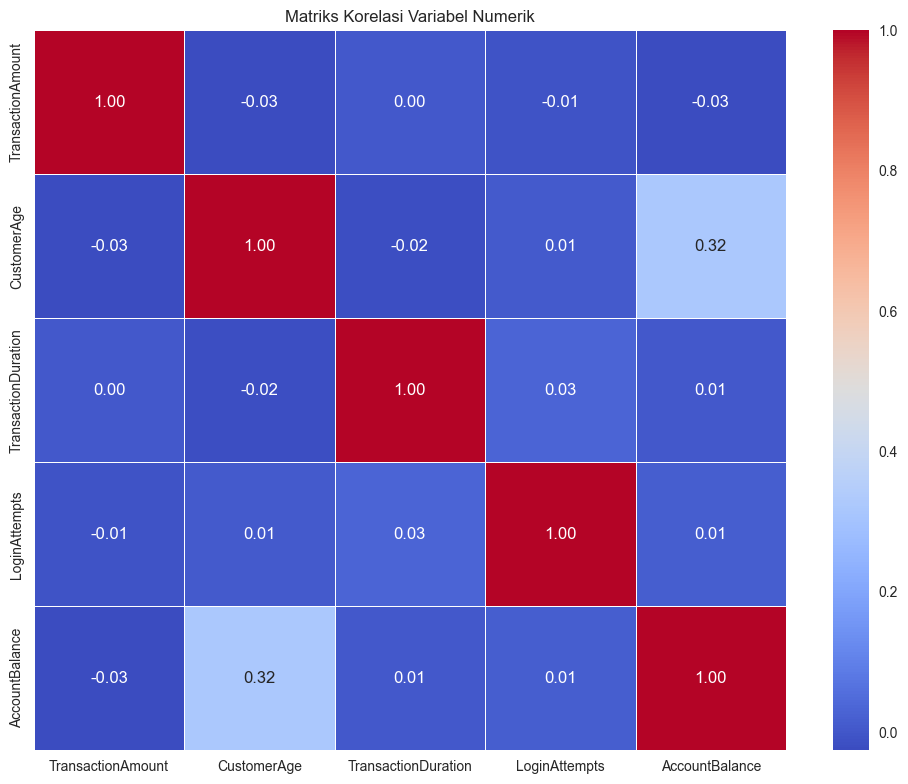

In [11]:
# Hitung matriks korelasi
correlation_matrix = df[numerical_cols].corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi Variabel Numerik')
plt.tight_layout()
plt.show()

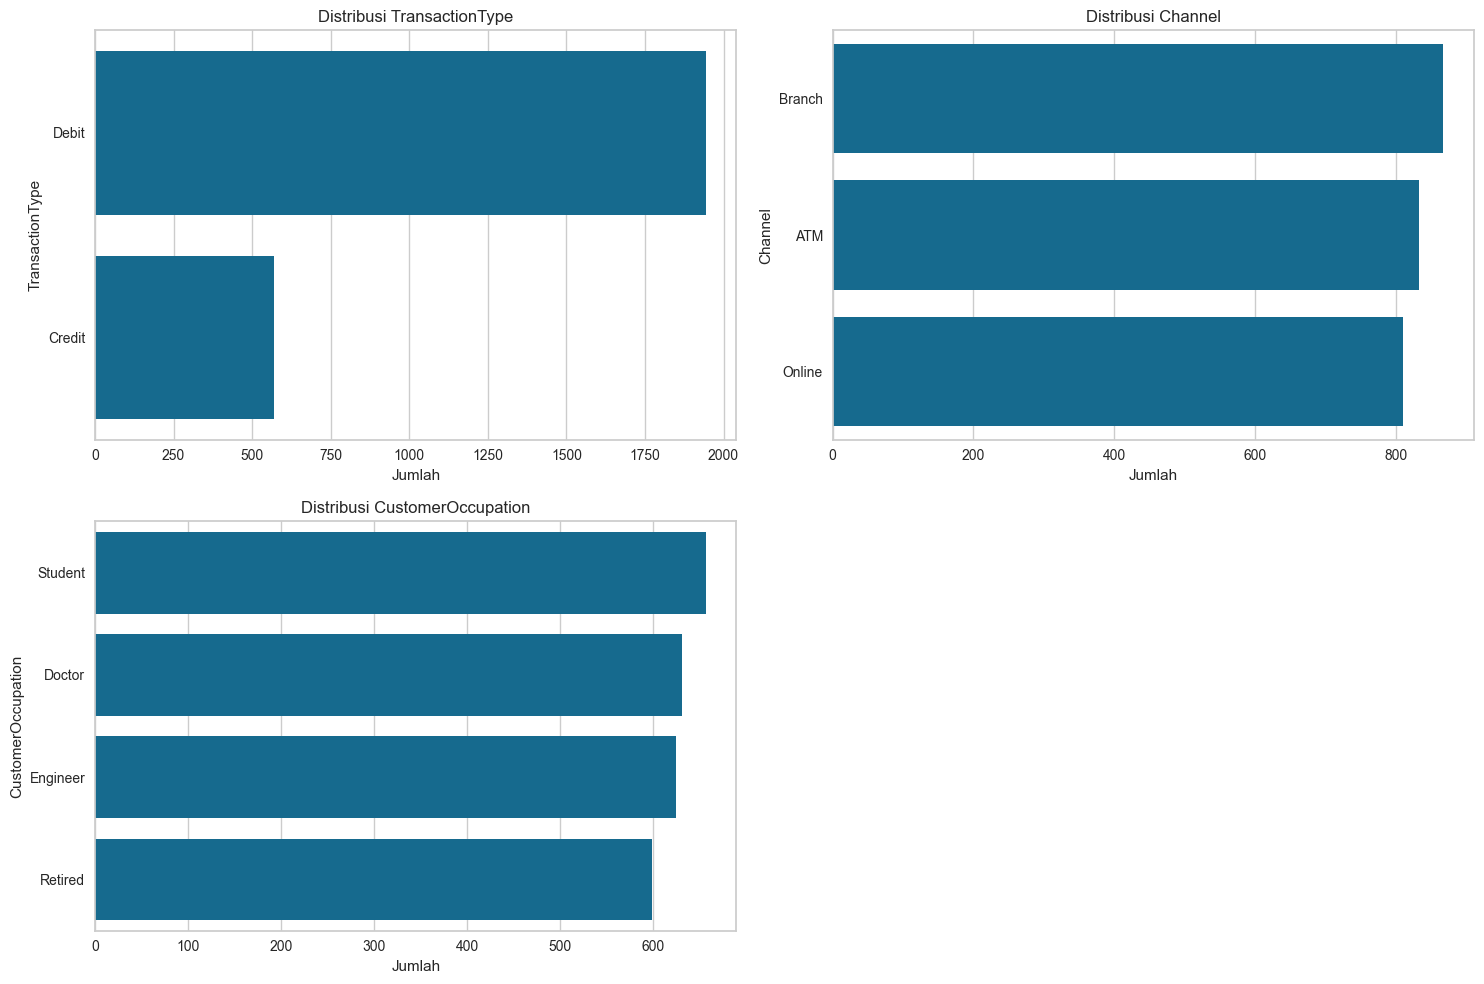

In [12]:
# Visualisasi variabel kategorik
# Identifikasi kolom kategorik
categorical_cols = df.select_dtypes(include=['object']).columns
# Kecualikan data yang memiliki sifat identifier unik/tidak relevan
categorical_cols = [col for col in categorical_cols if col not in ['TransactionID', 'AccountID', 'TransactionDate', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate']]

# Menentukan jumlah variabel kategorikal
num_categorical_vars = len(categorical_cols)

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 2  # Sesuaikan jumlah kolom sesuai preferensi
n_rows = -(-num_categorical_vars // n_cols)  # Ceiling division

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Sesuaikan ukuran figure
axes = axes.flatten()

# Plot bar chart (countplot) untuk setiap variabel kategorikal
for i, column in enumerate(categorical_cols):
    sns.countplot(data=df, y=column, order=df[column].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribusi {column}')
    axes[i].set_xlabel('Jumlah')
    axes[i].set_ylabel(column)

# Menghapus subplot yang tidak terpakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

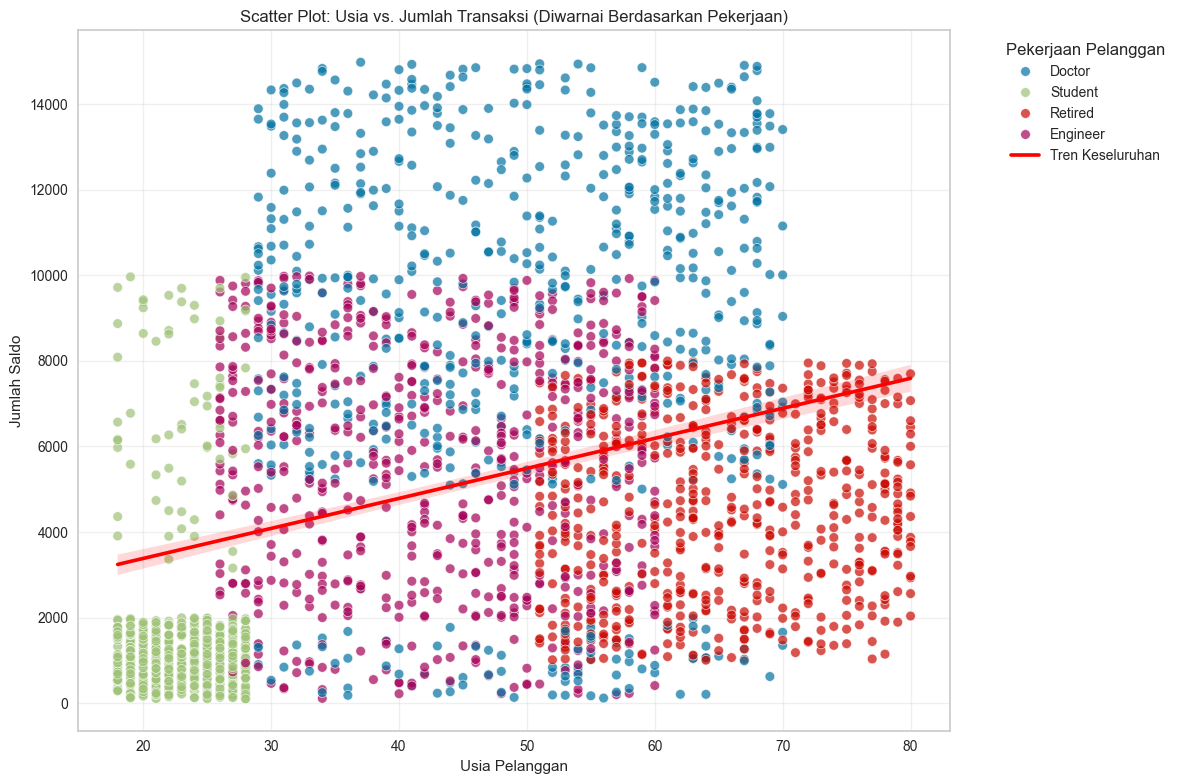

In [13]:
# Korelasi antara CustomerAge, TransactionAmount, dan CustomerOccupation
plt.figure(figsize=(12, 8))  # Sesuaikan ukuran figure jika perlu
sns.scatterplot(x='CustomerAge', y='AccountBalance', hue='CustomerOccupation', data=df, alpha=0.7)
# Menambahkan garis regresi (overall)
sns.regplot(x='CustomerAge', y='AccountBalance', data=df, scatter=False, color='red', label='Tren Keseluruhan')

plt.title('Scatter Plot: Usia vs. Jumlah Transaksi (Diwarnai Berdasarkan Pekerjaan)')
plt.xlabel('Usia Pelanggan')
plt.ylabel('Jumlah Saldo')
plt.legend(title='Pekerjaan Pelanggan', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar plot
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Ada indikasi korelasi positif yang lemah hingga sedang antara usia pelanggan dan jumlah transaksi dalam dataset ini. Namun, variabel CustomerOccupation juga tampaknya memainkan peran dalam pola transaksi, dan korelasi mungkin berbeda untuk setiap kelompok pekerjaan.

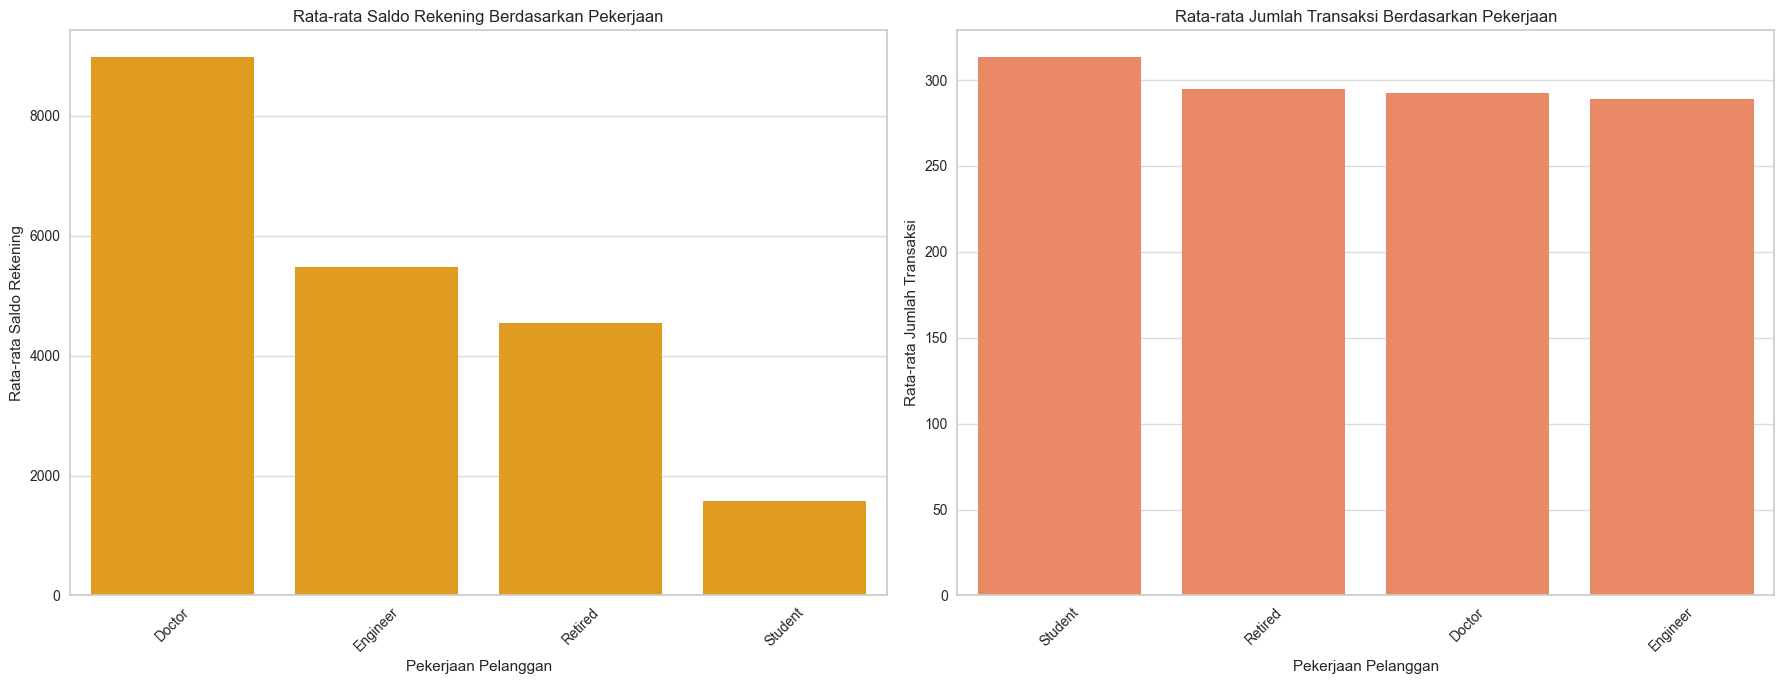

In [14]:
# Membuat figure dengan dua subplot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(18, 7))  # 1 baris, 2 kolom

# Subplot 1: Bar Chart Rata-rata AccountBalance berdasarkan CustomerOccupation
average_balance_by_occupation = df.groupby('CustomerOccupation')['AccountBalance'].mean().sort_values(ascending=False)
sns.barplot(x=average_balance_by_occupation.index, y=average_balance_by_occupation.values, color='orange', ax=axes[0])
axes[0].set_title('Rata-rata Saldo Rekening Berdasarkan Pekerjaan')
axes[0].set_xlabel('Pekerjaan Pelanggan')
axes[0].set_ylabel('Rata-rata Saldo Rekening')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.7)

# Subplot 2: Bar Chart Rata-rata TransactionAmount berdasarkan CustomerOccupation
average_transaction_by_occupation = df.groupby('CustomerOccupation')['TransactionAmount'].mean().sort_values(ascending=False)
sns.barplot(x=average_transaction_by_occupation.index, y=average_transaction_by_occupation.values, color='coral', ax=axes[1])
axes[1].set_title('Rata-rata Jumlah Transaksi Berdasarkan Pekerjaan')
axes[1].set_xlabel('Pekerjaan Pelanggan')
axes[1].set_ylabel('Rata-rata Jumlah Transaksi')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.7)

plt.tight_layout()
plt.show()

Rata-rata jumlah transaksi ternyata hanya berbeda tipis antar profesi, namun rata-rata saldo rekening lebih memiliki perbedaan yang signifikan. Dapat disimpulkan juga, jumlah saldo tidak terlalu memengaruhi besar transaksi yang dilakukan.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [15]:
print("Jumlah duplikasi: ", df.duplicated().sum())
df.describe()

Jumlah duplikasi:  0


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [16]:
# Menghilangkan kolom/fitur kategorik yang kurang relevan/terlalu banyak kategori utk encoding
hapus_fitur = ['TransactionID', 'AccountID', 'TransactionDate', 'Location', 'DeviceID', 'IP Address', 
               'MerchantID', 'PreviousTransactionDate']

# Membuat salinan DataFrame
df_cleaned = df.copy()
# Menghilangkan fitur-fitur yang ada dalam daftar
df_cleaned = df_cleaned.drop(columns=[col for col in hapus_fitur if col in df_cleaned.columns], errors='ignore')

print(f"DataFrame setelah menghilangkan fitur: {df_cleaned.shape}\n")
print(df_cleaned.head())

DataFrame setelah menghilangkan fitur: (2512, 8)

   TransactionAmount TransactionType Channel  CustomerAge CustomerOccupation  \
0              14.09           Debit     ATM           70             Doctor   
1             376.24           Debit     ATM           68             Doctor   
2             126.29           Debit  Online           19            Student   
3             184.50           Debit  Online           26            Student   
4              13.45          Credit  Online           26            Student   

   TransactionDuration  LoginAttempts  AccountBalance  
0                   81              1         5112.21  
1                  141              1        13758.91  
2                   56              1         1122.35  
3                   25              1         8569.06  
4                  198              1         7429.40  


In [17]:
categorical_cols = df_cleaned.select_dtypes(include='object').columns
df_cleaned[categorical_cols]

,TransactionType,Channel,CustomerOccupation
0,Debit,ATM,Doctor
1,Debit,ATM,Doctor
2,Debit,Online,Student
3,Debit,Online,Student
4,Credit,Online,Student
...,...,...,...
2507,Credit,Branch,Doctor
2508,Debit,Branch,Doctor
2509,Debit,Branch,Retired
2510,Debit,Online,Student


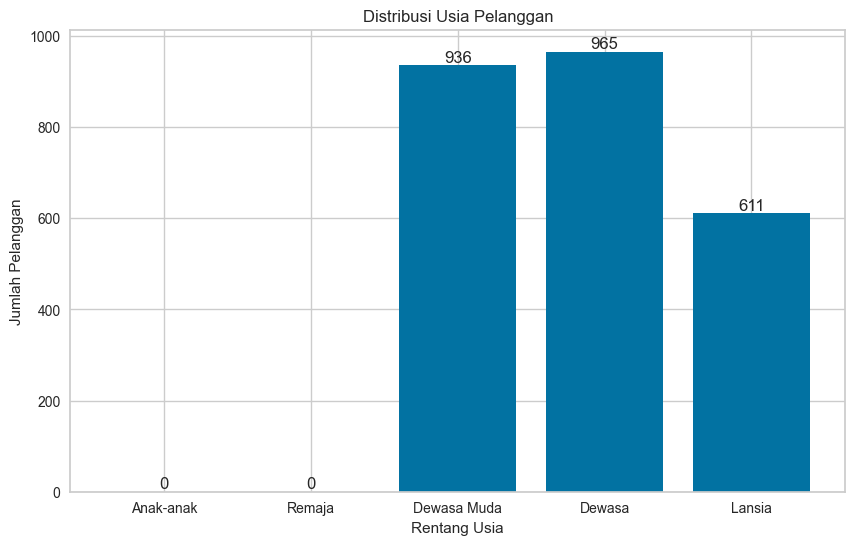

In [18]:
# Binning untuk kolom 'CustomerAge'
bins_age = [0, 12, 18, 35, 60, float('inf')]
labels_age = ['Anak-anak', 'Remaja', 'Dewasa Muda', 'Dewasa', 'Lansia']
df_cleaned['AgeCategory'] = pd.cut(df_cleaned['CustomerAge'], bins=bins_age, labels=labels_age, right=False)
# Visualisasi Distribusi Usia
age_bins = ['Anak-anak', 'Remaja', 'Dewasa Muda', 'Dewasa', 'Lansia']
age_counts = df_cleaned['AgeCategory'].value_counts().reindex(age_bins).fillna(0).astype(int)

plt.figure(figsize=(10, 6))
plt.bar(age_bins, age_counts.values)
plt.title("Distribusi Usia Pelanggan")
plt.xlabel("Rentang Usia")
plt.ylabel("Jumlah Pelanggan")
for i, count in enumerate(age_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

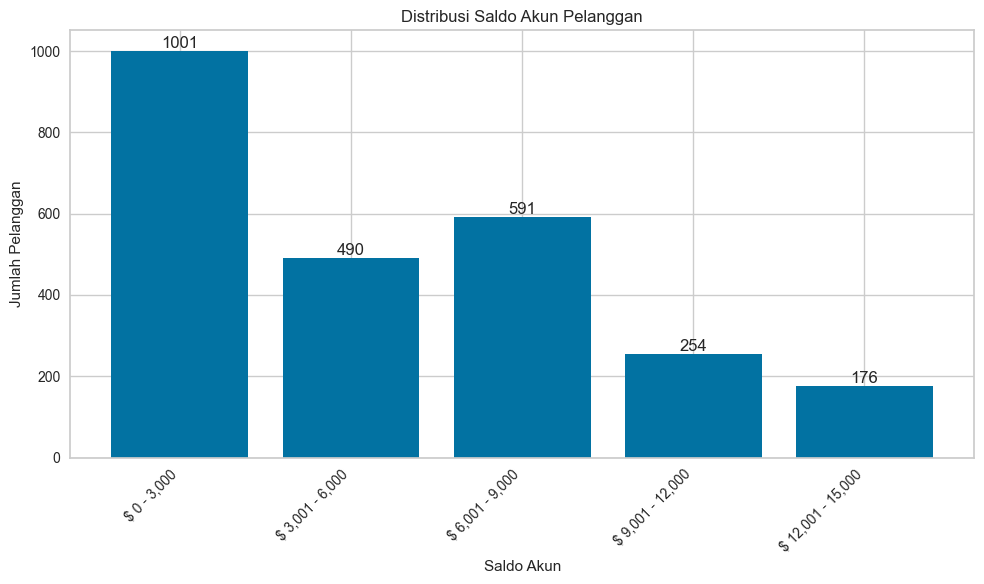

In [19]:
# Binning AccountBalance
bins_balance = [0, 3000, 6000, 9000, 12000, 15000]
labels_balance = ['$ 0 - 3,000', '$ 3,001 - 6,000', '$ 6,001 - 9,000', '$ 9,001 - 12,000', '$ 12,001 - 15,000']
df_cleaned['BalanceCategory'] = pd.cut(df_cleaned['AccountBalance'], bins=bins_balance, labels=labels_balance, right=False, include_lowest=True)

# Visualisasi Distribusi Saldo Akun
balance_bins = ['$ 0 - 3,000', '$ 3,001 - 6,000', '$ 6,001 - 9,000', '$ 9,001 - 12,000', '$ 12,001 - 15,000']
balance_counts = df_cleaned['BalanceCategory'].value_counts().reindex(balance_bins).fillna(0).astype(int)

plt.figure(figsize=(10, 6))
plt.bar(balance_bins, balance_counts.values)
plt.title("Distribusi Saldo Akun Pelanggan")
plt.xlabel("Saldo Akun")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=45, ha='right')
for i, count in enumerate(balance_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [20]:
# Encoding data kategorikal menggunakan One-Hot Encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_data = ohe.fit_transform(df_cleaned[categorical_cols])
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
df_ohe = pd.DataFrame(ohe_data, columns=ohe_feature_names, index=df_cleaned.index)
# Gabungkan
df_cleaned = pd.concat([df_cleaned.drop(columns=categorical_cols), df_ohe], axis=1)
df_cleaned

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,AgeCategory,BalanceCategory,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,14.09,70,81,1,5112.21,Lansia,"$ 3,001 - 6,000",0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,376.24,68,141,1,13758.91,Lansia,"$ 12,001 - 15,000",0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,126.29,19,56,1,1122.35,Dewasa Muda,"$ 0 - 3,000",0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,184.50,26,25,1,8569.06,Dewasa Muda,"$ 6,001 - 9,000",0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,13.45,26,198,1,7429.40,Dewasa Muda,"$ 6,001 - 9,000",1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,33,109,1,12690.79,Dewasa Muda,"$ 12,001 - 15,000",1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2508,251.54,48,177,1,254.75,Dewasa,"$ 0 - 3,000",0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2509,28.63,56,146,1,3382.91,Dewasa,"$ 3,001 - 6,000",0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2510,185.97,23,19,1,1776.91,Dewasa Muda,"$ 0 - 3,000",0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [21]:
df_cleaned.isna().sum()

TransactionAmount              0
CustomerAge                    0
TransactionDuration            0
LoginAttempts                  0
AccountBalance                 0
AgeCategory                    0
BalanceCategory                0
TransactionType_Credit         0
TransactionType_Debit          0
Channel_ATM                    0
Channel_Branch                 0
Channel_Online                 0
CustomerOccupation_Doctor      0
CustomerOccupation_Engineer    0
CustomerOccupation_Retired     0
CustomerOccupation_Student     0
dtype: int64

In [22]:
# Bandingkan outlier
# Menentukan quartile dan interquartile
q1 = df_cleaned[numerical_cols].quantile(0.25)
q3 = df_cleaned[numerical_cols].quantile(0.75)
IQR = q3 - q1
# Menentukan batas bawah dan atas untuk mendeteksi outlier
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Menampilkan jumlah outlier per fitur
outliers = ((df_cleaned[numerical_cols] < lower_bound) | (df_cleaned[numerical_cols] > upper_bound)).sum()
print(outliers)

TransactionAmount      113
CustomerAge              0
TransactionDuration      0
LoginAttempts          122
AccountBalance           0
dtype: int64


In [23]:
# Mengubah outlier ke batas terdekat mungkin lebih baik daripada menghapus utk clustering K-Means
# Data outlier TransactionAmount semuanya skewed ke arah frekuensi yang lebih tinggi
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    capped_series = np.where(series < lower_bound, lower_bound, series)
    capped_series = np.where(capped_series > upper_bound, upper_bound, capped_series)
    return capped_series

# Hanya menerapkan capping pada kolom 'TransactionAmount'
df_cleaned['TransactionAmount'] = cap_outliers(df_cleaned['TransactionAmount'])

# Tampilkan beberapa baris pertama dari kolom 'TransactionAmount' setelah capping
print(df_cleaned[['TransactionAmount']].head())


   TransactionAmount
0              14.09
1             376.24
2             126.29
3             184.50
4              13.45


In [24]:
# Bandingkan outlier
# Menentukan quartile dan interquartile
q1 = df_cleaned[numerical_cols].quantile(0.25)
q3 = df_cleaned[numerical_cols].quantile(0.75)
IQR = q3 - q1
# Menentukan batas bawah dan atas untuk mendeteksi outlier
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Menampilkan jumlah outlier per fitur
outliers = ((df_cleaned[numerical_cols] < lower_bound) | (df_cleaned[numerical_cols] > upper_bound)).sum()
print(outliers)

TransactionAmount        0
CustomerAge              0
TransactionDuration      0
LoginAttempts          122
AccountBalance           0
dtype: int64


In [25]:
# Kolom numerik pada df_cleaned, termasuk yang sudah di encode
df_numerical = df_cleaned.select_dtypes(include=['number'])

# Hitung mean dan standar deviasi
print("Mean per kolom:")
print(df_numerical.mean())
print("\nStandar Deviasi per kolom:")
print(df_numerical.std())

# Hitung nilai minimum dan maksimum
print("\nMinimum per kolom:")
print(df_numerical.min())
print("\nMaksimum per kolom:")
print(df_numerical.max())

Mean per kolom:
TransactionAmount               284.847250
CustomerAge                      44.673965
TransactionDuration             119.643312
LoginAttempts                     1.124602
AccountBalance                 5114.302966
TransactionType_Credit            0.226115
TransactionType_Debit             0.773885
Channel_ATM                       0.331608
Channel_Branch                    0.345541
Channel_Online                    0.322850
CustomerOccupation_Doctor         0.251194
CustomerOccupation_Engineer       0.248806
CustomerOccupation_Retired        0.238455
CustomerOccupation_Student        0.261545
dtype: float64

Standar Deviasi per kolom:
TransactionAmount               252.067285
CustomerAge                      17.792198
TransactionDuration              69.963757
LoginAttempts                     0.602662
AccountBalance                 3900.942499
TransactionType_Credit            0.418398
TransactionType_Debit             0.418398
Channel_ATM                       0.47

In [26]:
# Karena skala yang jauh antara kolom numerik, maka harus dilakukan standarisasi
# Standarisasi fitur numerik berdasarkan Z-score scaling
scaler = StandardScaler()
# Transformasi fitur numerik
df_scaled = scaler.fit_transform(df_numerical)

# Ubah kembali ke DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_numerical.columns, index=df_numerical.index)
df_scaled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-1.074361,1.423718,-0.552443,-0.206794,-0.000537,-0.540538,0.540538,1.419720,-0.726623,-0.690491,1.726552,-0.575512,-0.559572,-0.595128
1,0.362645,1.311287,0.305314,-0.206794,2.216472,-0.540538,0.540538,1.419720,-0.726623,-0.690491,1.726552,-0.575512,-0.559572,-0.595128
2,-0.629153,-1.443277,-0.909842,-0.206794,-1.023534,-0.540538,0.540538,-0.704364,-0.726623,1.448244,-0.579189,-0.575512,-0.559572,1.680309
3,-0.398176,-1.049768,-1.353017,-0.206794,0.885797,-0.540538,0.540538,-0.704364,-0.726623,1.448244,-0.579189,-0.575512,-0.559572,1.680309
4,-1.076900,-1.049768,1.120184,-0.206794,0.593589,1.850010,-1.850010,-0.704364,-0.726623,1.448244,-0.579189,-0.575512,-0.559572,1.680309


In [27]:
# Binning 'TransactionAmount' setelah standarisasi
bins = [-float('inf'), -1, 1, 3, float('inf')] # Sesuaikan batas sesuai kebutuhan
labels = ['Sangat Rendah', 'Rendah', 'Tinggi', 'Sangat Tinggi']
df_scaled['TransactionAmount_Binned'] = pd.cut(df_scaled['TransactionAmount'], bins=bins, labels=labels, right=False)
print(df_scaled[['TransactionAmount', 'TransactionAmount_Binned']].sample(5))

      TransactionAmount TransactionAmount_Binned
664           -0.155455                   Rendah
509           -0.745811                   Rendah
1030           0.273167                   Rendah
78            -0.652961                   Rendah
2231          -0.863740                   Rendah


In [28]:
# Pilih ulang kolom numerik setelah perubahan
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
# Drop kolom numerik asli dari df_cleaned
df_cleaned = df_cleaned.drop(columns=numerical_cols)

# Gabungkan dengan hasil standarisasi
df_cleaned = pd.concat([df_cleaned, df_scaled], axis=1)


In [29]:
df_cleaned.head()

,AgeCategory,BalanceCategory,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,TransactionAmount_Binned
0,Lansia,"$ 3,001 - 6,000",-1.074361,1.423718,-0.552443,-0.206794,-0.000537,-0.540538,0.540538,1.419720,-0.726623,-0.690491,1.726552,-0.575512,-0.559572,-0.595128,Sangat Rendah
1,Lansia,"$ 12,001 - 15,000",0.362645,1.311287,0.305314,-0.206794,2.216472,-0.540538,0.540538,1.419720,-0.726623,-0.690491,1.726552,-0.575512,-0.559572,-0.595128,Rendah
2,Dewasa Muda,"$ 0 - 3,000",-0.629153,-1.443277,-0.909842,-0.206794,-1.023534,-0.540538,0.540538,-0.704364,-0.726623,1.448244,-0.579189,-0.575512,-0.559572,1.680309,Rendah
3,Dewasa Muda,"$ 6,001 - 9,000",-0.398176,-1.049768,-1.353017,-0.206794,0.885797,-0.540538,0.540538,-0.704364,-0.726623,1.448244,-0.579189,-0.575512,-0.559572,1.680309,Rendah
4,Dewasa Muda,"$ 6,001 - 9,000",-1.076900,-1.049768,1.120184,-0.206794,0.593589,1.850010,-1.850010,-0.704364,-0.726623,1.448244,-0.579189,-0.575512,-0.559572,1.680309,Sangat Rendah


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [30]:
df_numerical = df_cleaned.select_dtypes(include=['number'])
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(df_numerical)  # Latih pada kolom numerik

# Mendapatkan label dan jumlah cluster
labels = kmeans.labels_
k = 5
# Menambahkan label cluster ke df_cleaned
df_numerical['Cluster'] = labels

# Menampilkan distribusi cluster dalam bentuk tabel
cluster_counts = df_numerical['Cluster'].value_counts().sort_index()
print("Distribusi Cluster:")
print(cluster_counts)

Distribusi Cluster:
Cluster
0    486
1    518
2    568
3    491
4    449
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

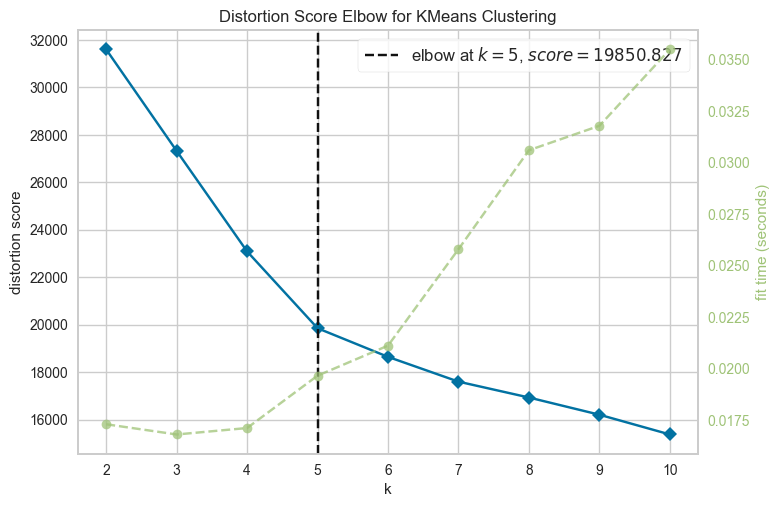

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# Menentukan jumlah cluster yang optimal dg Elbow Method
# Inisialisasi model KMeans
kmeans = KMeans(random_state=42, n_init=10) # Tambahkan random_state untuk reproducibility
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(2, 11)) # Rentang k disesuaikan (minimal 2 cluster)
# Fit visualizer dengan data yang di-scaling
visualizer.fit(df_numerical)

visualizer.show()

In [32]:
sil_before = silhouette_score(df_numerical, labels)
print(f"Silhouette Score sebelum Feature Selection: {sil_before:.4f}")

Silhouette Score sebelum Feature Selection: 0.2790


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [33]:
optimal_k = 5
# Hyperparameter Tuning dengan jumlah cluster optimal
kmeans_optimized = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300, tol=1e-4)
# Fit model dan prediksi cluster
labels_optimized = kmeans_optimized.fit_predict(df_numerical)

# Tambahkan kolom cluster ke DataFrame df_numerical
df_numerical['Cluster_KMeans_Optimized'] = labels_optimized

# Evaluasi ulang dengan Silhouette Score
sil_score_optimized = silhouette_score(df_numerical, labels_optimized)
print(f"Silhouette Score (Optimized K-Means): {sil_score_optimized:.4f}")
# Tampilkan distribusi cluster
print("\nDistribusi Cluster:")
print(df_numerical['Cluster_KMeans_Optimized'].value_counts().sort_index())

Silhouette Score (Optimized K-Means): 0.3332

Distribusi Cluster:
Cluster_KMeans_Optimized
0    486
1    449
2    518
3    491
4    568
Name: count, dtype: int64


In [34]:
from sklearn.feature_selection import VarianceThreshold

optimal_k = 5
# Feature Selection dengan VarianceThreshold
selector = VarianceThreshold(threshold=0.15)
df_selected_variance = selector.fit_transform(df_numerical)

# Pelatihan K-Means dengan data terpilih
kmeans_variance = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_variance = kmeans_variance.fit_predict(df_selected_variance)

# Evaluasi dengan Silhouette Score
sil_score_variance = silhouette_score(df_selected_variance, labels_variance)
print(f'Silhouette Score (VarianceThreshold): {sil_score_variance:.4f}')

# Tampilkan distribusi cluster
print("Distribusi Cluster (VarianceThreshold):")
print(pd.Series(labels_variance).value_counts().sort_index())

Silhouette Score (VarianceThreshold): 0.3332
Distribusi Cluster (VarianceThreshold):
0    486
1    568
2    449
3    518
4    491
Name: count, dtype: int64


In [35]:
from sklearn.ensemble import RandomForestClassifier

# Pelatihan K-Means untuk mendapatkan label cluster
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_numerical)

# Pelatihan RandomForestClassifier untuk feature selection
rf = RandomForestClassifier(random_state=42)
rf.fit(df_numerical, kmeans_labels)

importances = rf.feature_importances_

# Memilih fitur-fitur penting
feature_indices = np.argsort(importances)[::-1]
top_features = feature_indices[:5]
df_selected_rf = df_numerical.iloc[:, top_features]

# Pelatihan K-Means dengan fitur-fitur terpilih
kmeans_rf = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_rf = kmeans_rf.fit_predict(df_selected_rf)

# Tambahkan label cluster ke df_numerical
df['Cluster_RF'] = pd.Series(labels_rf, index=df_numerical.index)

# Evaluasi dengan Silhouette Score
sil_score_rf = silhouette_score(df_selected_rf, labels_rf)
print(f'Silhouette Score (RandomForest Feature Selection): {sil_score_rf:.4f}')

# Tampilkan distribusi cluster
print("Distribusi Cluster (RandomForest Feature Selection):")
print(pd.Series(labels_rf).value_counts().sort_index())

Silhouette Score (RandomForest Feature Selection): 0.9505
Distribusi Cluster (RandomForest Feature Selection):
0    486
1    491
2    568
3    518
4    449
Name: count, dtype: int64


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [36]:
print(df.columns)

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'Cluster_RF'],
      dtype='object')


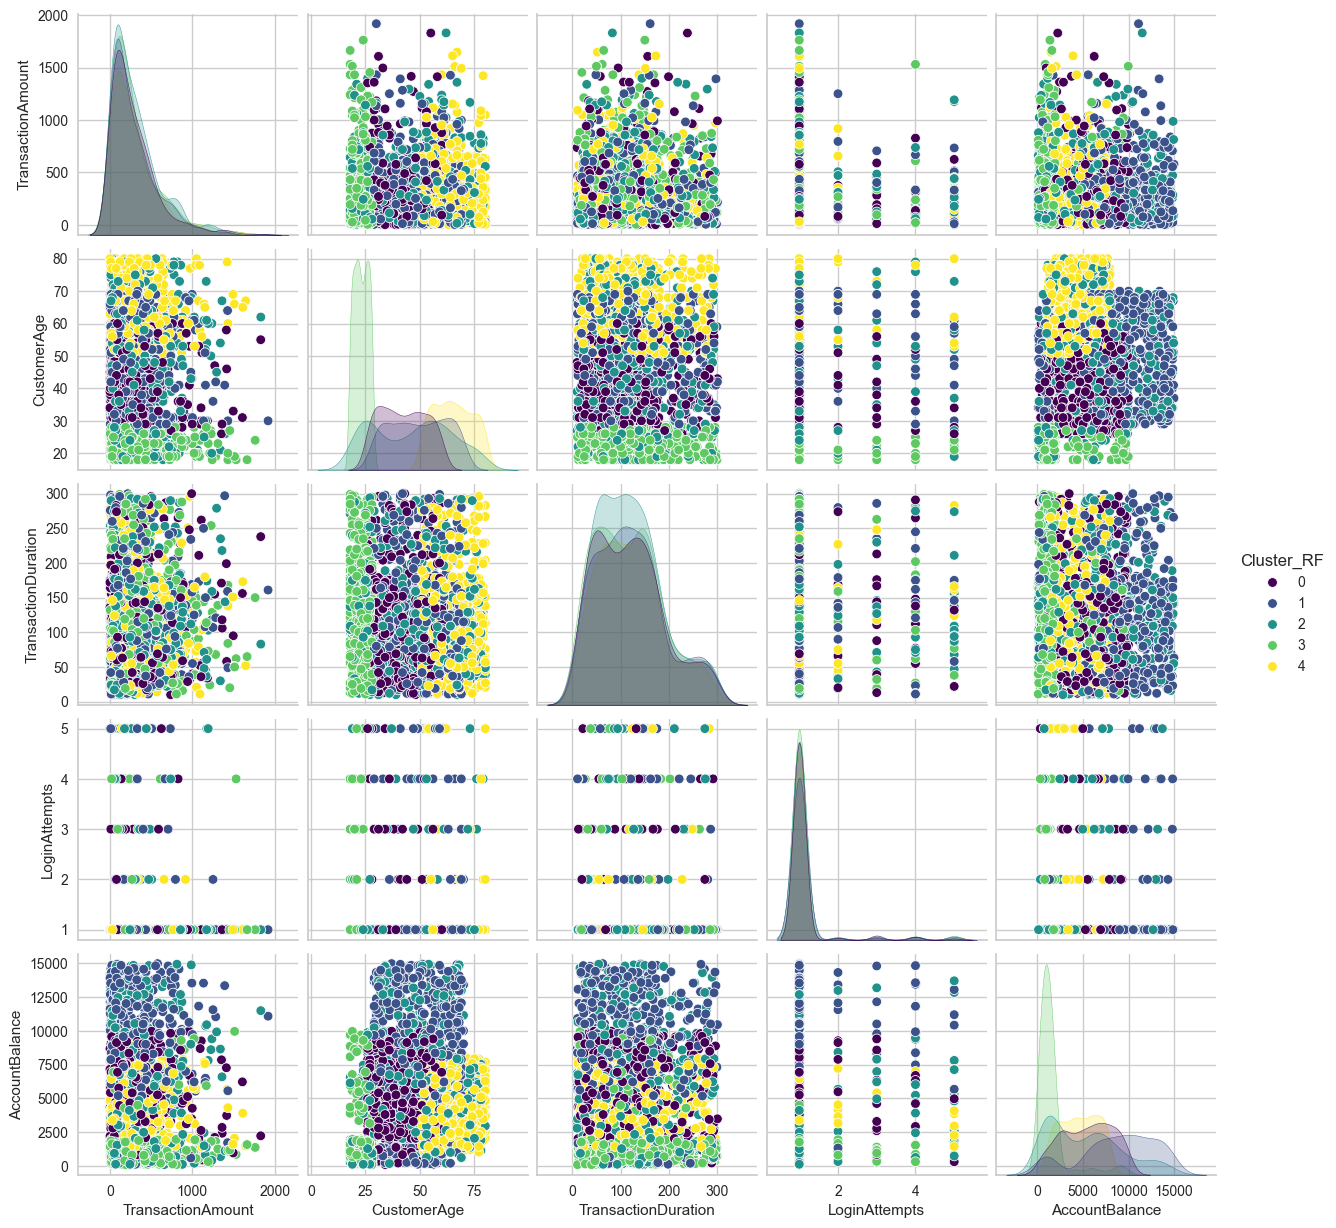

In [37]:
numerical_features = df.select_dtypes(include=['number']).columns
sns.pairplot(df[numerical_features], hue='Cluster_RF', palette='viridis')
plt.show()

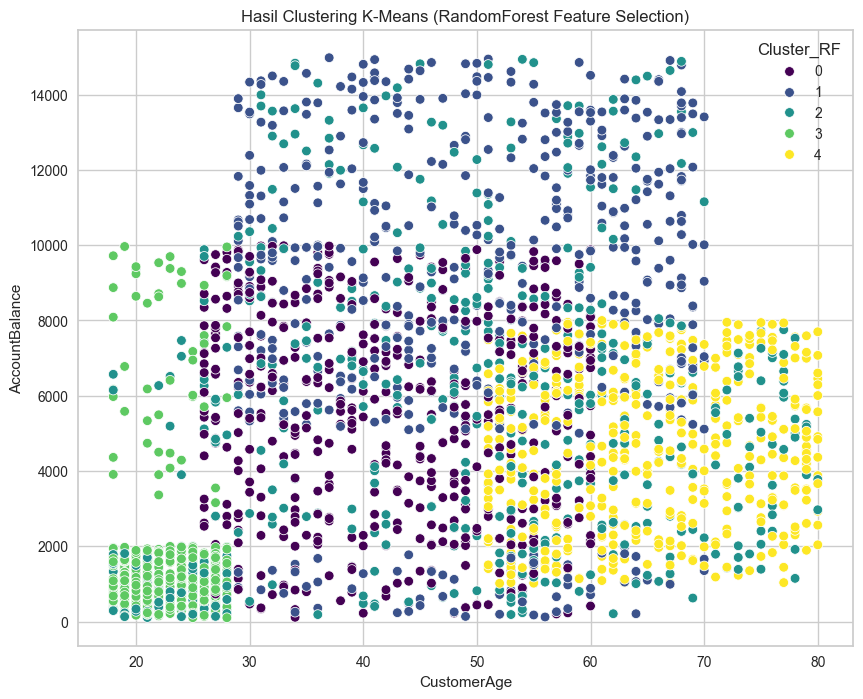

In [38]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df['CustomerAge'],
    y=df['AccountBalance'],
    hue='Cluster_RF',
    palette='viridis',
    data=df,  # Menggunakan df(data mentah) sebagai data
)
plt.title('Hasil Clustering K-Means (RandomForest Feature Selection)')
plt.xlabel('CustomerAge')
plt.ylabel('AccountBalance')
plt.show()

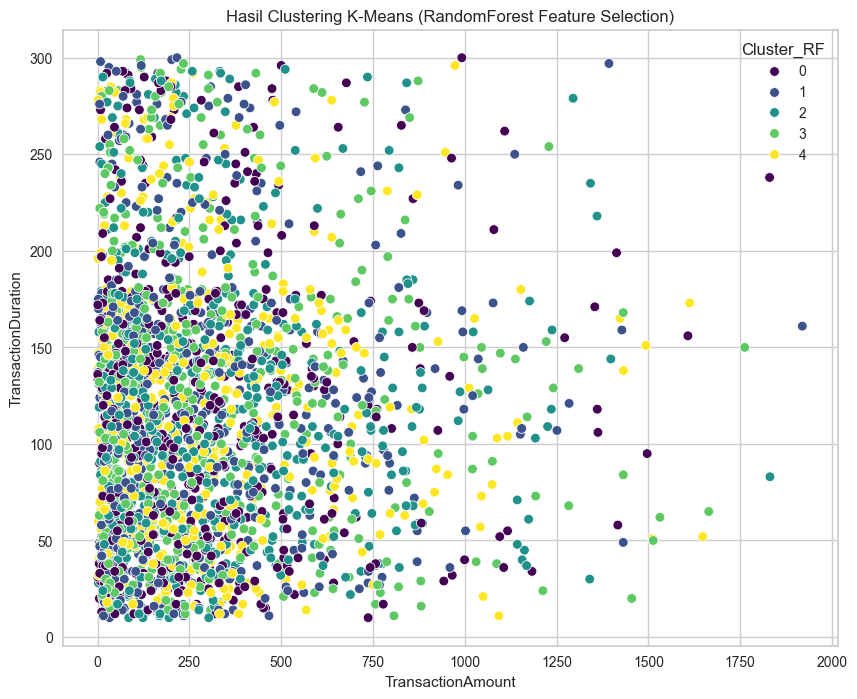

In [39]:
# dr data mentah
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df['TransactionAmount'],
    y=df['TransactionDuration'],
    hue='Cluster_RF',
    palette='viridis',
    data=df  # Menggunakan df (data menntah)
)
plt.title('Hasil Clustering K-Means (RandomForest Feature Selection)')
plt.xlabel('TransactionAmount')
plt.ylabel('TransactionDuration')
plt.show()

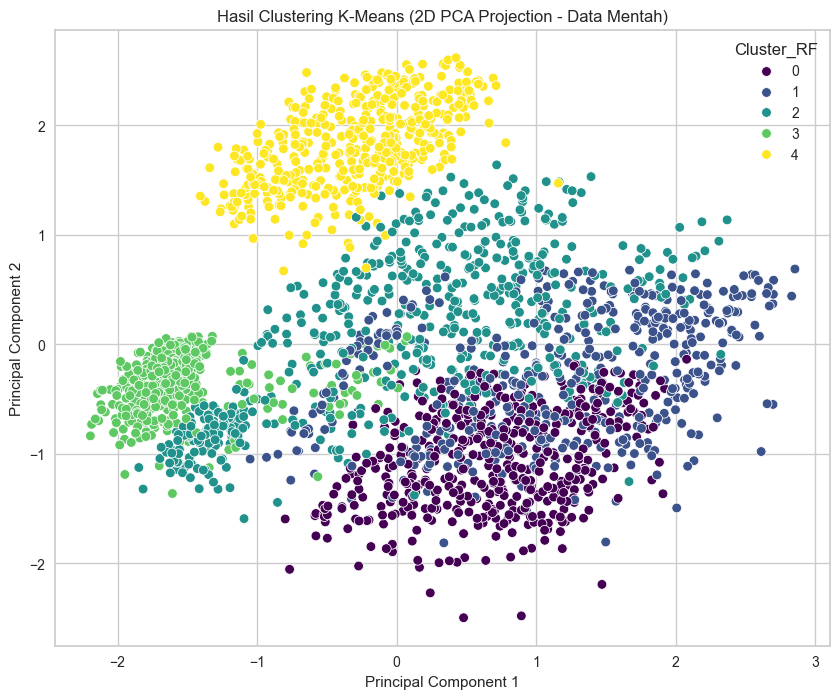

In [40]:
from sklearn.decomposition import PCA

# Pilih fitur numerik dari df
numerical_features = df.select_dtypes(include=['number']).columns

# Scaling data numerik
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Buat DataFrame dari hasil PCA
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])

# Tambahkan label cluster dari df_numerical ke pca_df
pca_df['Cluster_RF'] = df['Cluster_RF'].values

# Buat scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster_RF',
    palette='viridis',
    data=pca_df,
)
plt.title('Hasil Clustering K-Means (2D PCA Projection - Data Mentah)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [41]:
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster_RF
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,1
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,3
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,3
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29,2
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42,1
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39,4
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22,3


In [42]:
df_numerical

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Cluster,Cluster_KMeans_Optimized
0,-1.074361,1.423718,-0.552443,-0.206794,-0.000537,-0.540538,0.540538,1.419720,-0.726623,-0.690491,1.726552,-0.575512,-0.559572,-0.595128,3,3
1,0.362645,1.311287,0.305314,-0.206794,2.216472,-0.540538,0.540538,1.419720,-0.726623,-0.690491,1.726552,-0.575512,-0.559572,-0.595128,3,3
2,-0.629153,-1.443277,-0.909842,-0.206794,-1.023534,-0.540538,0.540538,-0.704364,-0.726623,1.448244,-0.579189,-0.575512,-0.559572,1.680309,1,2
3,-0.398176,-1.049768,-1.353017,-0.206794,0.885797,-0.540538,0.540538,-0.704364,-0.726623,1.448244,-0.579189,-0.575512,-0.559572,1.680309,1,2
4,-1.076900,-1.049768,1.120184,-0.206794,0.593589,1.850010,-1.850010,-0.704364,-0.726623,1.448244,-0.579189,-0.575512,-0.559572,1.680309,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,2.267159,-0.656259,-0.152156,-0.206794,1.942606,1.850010,-1.850010,-0.704364,1.376230,-0.690491,1.726552,-0.575512,-0.559572,-0.595128,2,4
2508,-0.132163,0.186975,0.819969,-0.206794,-1.245986,-0.540538,0.540538,-0.704364,1.376230,-0.690491,1.726552,-0.575512,-0.559572,-0.595128,3,3
2509,-1.016666,0.636700,0.376794,-0.206794,-0.443928,-0.540538,0.540538,-0.704364,1.376230,-0.690491,-0.579189,-0.575512,1.787080,-0.595128,4,1
2510,-0.392343,-1.218415,-1.438793,-0.206794,-0.855705,-0.540538,0.540538,-0.704364,-0.726623,1.448244,-0.579189,-0.575512,-0.559572,1.680309,1,2


In [43]:
numerical_features = df_numerical.drop(columns=['Cluster_RF', 'Cluster', 'Cluster_KMeans_Optimized'], errors='ignore').select_dtypes(include='number').columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical[numerical_features])
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features, index=df_numerical.index)

# Cek kolom yang terekam di scaler
print(scaler.feature_names_in_)

['TransactionAmount' 'CustomerAge' 'TransactionDuration' 'LoginAttempts'
 'AccountBalance' 'TransactionType_Credit' 'TransactionType_Debit'
 'Channel_ATM' 'Channel_Branch' 'Channel_Online'
 'CustomerOccupation_Doctor' 'CustomerOccupation_Engineer'
 'CustomerOccupation_Retired' 'CustomerOccupation_Student']


In [44]:
inversed = scaler.inverse_transform(df_scaled)
df_inversed = pd.DataFrame(inversed, columns=numerical_features, index=df_numerical.index)

# Re-attach cluster columns
for cluster_col in ['Cluster_RF', 'Cluster', 'Cluster_KMeans_Optimized']:
    if cluster_col in df_numerical.columns:
        df_inversed[cluster_col] = df_numerical[cluster_col].values

df_inversed.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Cluster,Cluster_KMeans_Optimized
0,-1.074361,1.423718,-0.552443,-0.206794,-0.000537,-0.540538,0.540538,1.419720,-0.726623,-0.690491,1.726552,-0.575512,-0.559572,-0.595128,3,3
1,0.362645,1.311287,0.305314,-0.206794,2.216472,-0.540538,0.540538,1.419720,-0.726623,-0.690491,1.726552,-0.575512,-0.559572,-0.595128,3,3
2,-0.629153,-1.443277,-0.909842,-0.206794,-1.023534,-0.540538,0.540538,-0.704364,-0.726623,1.448244,-0.579189,-0.575512,-0.559572,1.680309,1,2
3,-0.398176,-1.049768,-1.353017,-0.206794,0.885797,-0.540538,0.540538,-0.704364,-0.726623,1.448244,-0.579189,-0.575512,-0.559572,1.680309,1,2
4,-1.076900,-1.049768,1.120184,-0.206794,0.593589,1.850010,-1.850010,-0.704364,-0.726623,1.448244,-0.579189,-0.575512,-0.559572,1.680309,2,4


- Dalam proses preprocessing, saya sempat mencoba dua pendekatan untuk menangani outlier pada fitur TransactionAmount, yaitu outlier removal dan capping menggunakan batas atas (karena skew ke arah positif semua) berdasarkan IQR (Interquartile Range). Namun, setelah dilakukan pengujian visualisasi hasil clustering menggunakan PCA dan pairplot, saya menemukan bahwa removing outlier justru menyebabkan distribusi cluster menjadi tidak seimbang dan visualisasi menjadi kurang representatif.

- Konsekuensi dari capping ini adalah saat dilakukan inverse_transform() setelah proses standardisasi, muncul beberapa nilai TransactionAmount yang tampak negatif atau kurang sempurna. Hal ini terjadi karena proses capping memotong distribusi asli data.

- Namun demikian, secara statistik, nilai mean, median, dan distribusi keseluruhan tetap terjaga dengan baik. Hasil .describe() menunjukkan bahwa perbedaan signifikan hanya terjadi pada nilai minimum, sedangkan nilai mean, median, dan maksimum tetap konsisten dengan kondisi awal.

- Saya memilih untuk tetap menggunakan capping karena metode ini lebih menjaga kestabilan struktur data dan hasil visualisasi clustering, dibandingkan jika outlier benar-benar dihapus yang justru membuat distribusi cluster menjadi tidak seimbang. Meskipun ada sedikit konsekuensi pada hasil inverse, metode ini memastikan performa model dan visualisasi tetap optimal.

In [45]:
print(df['TransactionAmount'].describe())

count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64


In [46]:
print(df_inversed['TransactionAmount'].describe())

count    2.512000e+03
mean     8.344351e-17
std      1.000199e+00
min     -1.129238e+00
25%     -8.053511e-01
50%     -2.924692e-01
75%      5.145692e-01
max      2.494450e+00
Name: TransactionAmount, dtype: float64
